<img src="https://cdn-0.henrilechatnoir.com/wp-content/uploads/2019/12/google-play-store-788x443.jpg">

### DATA COLLECTION

In [228]:
import numpy as np
import pandas as pd

In [229]:
df=pd.read_csv("googleplaystore.csv")

### DATA PREPARATION

In [230]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [231]:
df.shape

(10841, 13)

In [232]:
df.isnull().mean()

App               0.000000
Category          0.000000
Rating            0.135965
Reviews           0.000000
Size              0.000000
Installs          0.000000
Type              0.000092
Price             0.000000
Content Rating    0.000092
Genres            0.000000
Last Updated      0.000000
Current Ver       0.000738
Android Ver       0.000277
dtype: float64

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [234]:
#replacing the nan values of Rating Column with mean value of Rating
mean=df["Rating"].mean()
df["Rating"].fillna(mean,axis=0,inplace=True)

In [235]:
#replacing the nan values of Current Ver
df["Current Ver"].value_counts().head(5)

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
Name: Current Ver, dtype: int64

In [236]:
#Since varies with device is most occured feature we will replace nan with this feature
df["Current Ver"].fillna("Varies with device",inplace=True)

In [237]:
#we will simply drop our remaing nan rows
df.dropna(axis=0,inplace=True)

In [238]:
df.isnull().mean()

App               0.0
Category          0.0
Rating            0.0
Reviews           0.0
Size              0.0
Installs          0.0
Type              0.0
Price             0.0
Content Rating    0.0
Genres            0.0
Last Updated      0.0
Current Ver       0.0
Android Ver       0.0
dtype: float64

Missing values our removed from our data set.

In [239]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [240]:
#cleaning our installs column
df.Installs=df.Installs.apply(lambda x: x.strip('+'))
df.Installs=df.Installs.apply(lambda x: x.replace(',',''))
df.Installs=df.Installs.replace('Free',np.nan)
df["Installs"]=df["Installs"].astype(int)

In [241]:
#cleaning our size column
df.Size=df.Size.replace( to_replace='k',value='e+3',regex=True)
df.Size=df.Size.replace('M','e+6',regex=True)
df.Size=df.Size.replace('Varies with device',np.nan)
df.Size=df.Size.replace('1,000+',1000)
df["Size"].dropna(inplace=True)
df.Size=df.Size.astype(float)

In [242]:
#replacing missing values from size column
mean=df["Size"].mean()
df["Size"].fillna(mean,inplace=True)

In [243]:
#converting reviews column from string to float
df["Reviews"]=df["Reviews"].astype(int)

In [244]:
#cleaning the price column
df.Price=df.Price.apply(lambda x: x.replace('$',''))
df.Price=df.Price.astype(float)

In [245]:
#dropping the non required columns
df.drop(["App","Genres","Last Updated","Current Ver","Android Ver"],axis=1,inplace=True)

In [246]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone


Finally,we have prepared our data.

### DATA VIZS

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

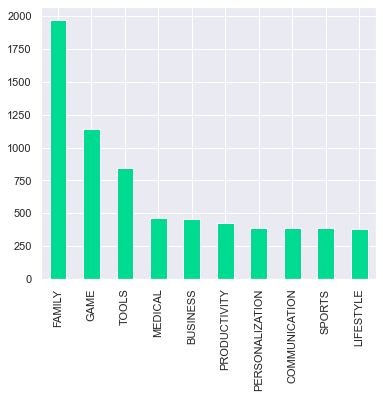

In [248]:
#Most Popular Categories..
plt.figure(figsize=(6,5))
sns.set(style="darkgrid",palette="winter_r")
df["Category"].value_counts().head(10).plot.bar()

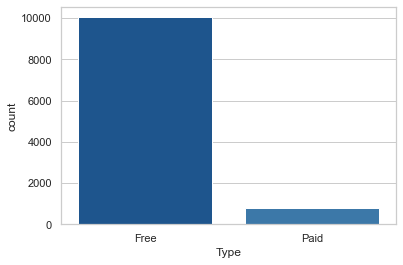

In [249]:
#Count of free vs paid apps
sns.set(style="whitegrid",palette="Blues_r")
sns.countplot(df["Type"])

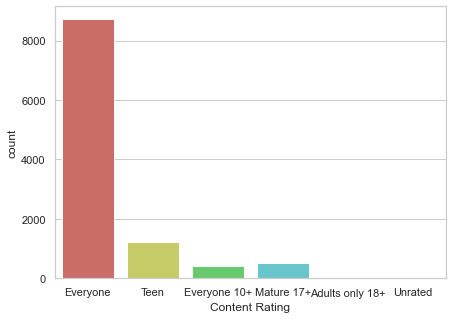

In [250]:
#Distribution of Content Ratings
plt.figure(figsize=(7,5))
sns.set(style="whitegrid",palette="hls")
sns.countplot(df["Content Rating"])

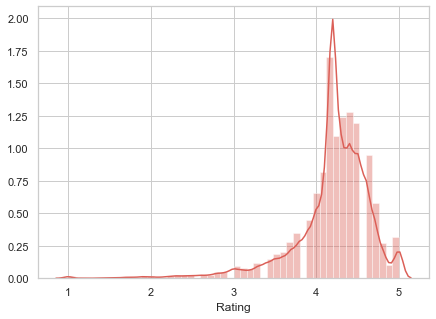

In [251]:
#distribution of Ratings column
plt.figure(figsize=(7,5))
sns.distplot(df["Rating"])

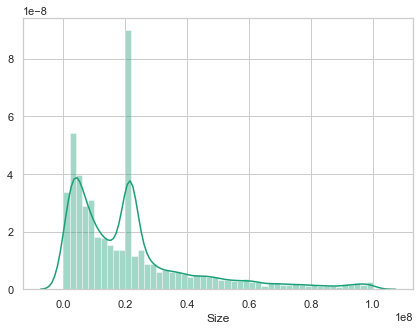

In [252]:
#distribution of size column
plt.figure(figsize=(7,5))
sns.set(style="whitegrid",palette="Dark2")
sns.distplot(df["Size"])

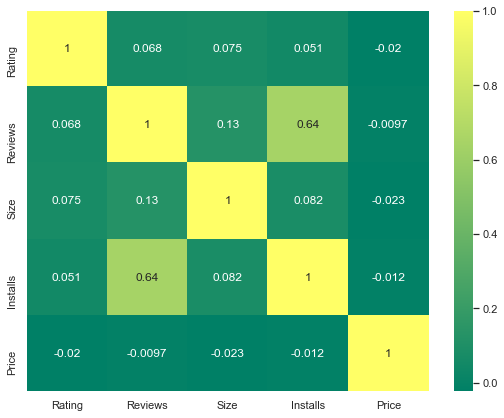

In [253]:
#checking the correlation amongst our features..
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True,cmap="summer")

In [254]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone


Now,we will build a model and try to predict Rating based on other features.

In [255]:
#dropping Category Column
df.drop("Category",axis=1,inplace=True)

In [256]:
#one hot encoding on the columns
df=pd.get_dummies(df,drop_first=True)

In [257]:
df.head()

,Rating,Reviews,Size,Installs,Price,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,159,19000000.0,10000,0.0,0,1,0,0,0,0
1,3.9,967,14000000.0,500000,0.0,0,1,0,0,0,0
2,4.7,87510,8700000.0,5000000,0.0,0,1,0,0,0,0
3,4.5,215644,25000000.0,50000000,0.0,0,0,0,0,1,0
4,4.3,967,2800000.0,100000,0.0,0,1,0,0,0,0


In [258]:
y=df.iloc[:,0]
X=df.iloc[:,1:]

In [259]:
y=y.astype(int)#since it's a classification model.

### MODEL BUILDING

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [261]:
from sklearn.ensemble import RandomForestClassifier
mod=RandomForestClassifier()
mod.fit(X_train,y_train)

RandomForestClassifier()

In [262]:
y_pred=mod.predict(X_test)

In [264]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[   1    0    3   13    1]
 [   0    4   12   56    1]
 [   2    4  120  384    5]
 [   2   17  166 2335   36]
 [   0    1    1   71   17]]
              precision    recall  f1-score   support

           1       0.20      0.06      0.09        18
           2       0.15      0.05      0.08        73
           3       0.40      0.23      0.29       515
           4       0.82      0.91      0.86      2556
           5       0.28      0.19      0.23        90

    accuracy                           0.76      3252
   macro avg       0.37      0.29      0.31      3252
weighted avg       0.72      0.76      0.73      3252

0.7616851168511685
